### Técnica de validación e modelos

train_test_split


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


In [14]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [15]:
X = pd.get_dummies(df.drop('body_mass_g', axis=1))
y = df['body_mass_g']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"train: {X_train.shape}, {y_train.shape}")
print(f"test: {X_test.shape}, {y_test.shape}")

train: (266, 11), (266,)
test: (67, 11), (67,)


#### cross_val_score

In [18]:
from sklearn.model_selection import cross_val_score

# neg_mean_absolute_error es la MAE pero en negativo para cumplir la convención de "mayor es mejor"
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[-220.38144928 -249.60757207 -285.90470845 -245.47929014 -181.47689761]
mean: -236.56998351139936, std: 34.58492822017874


<Axes: >

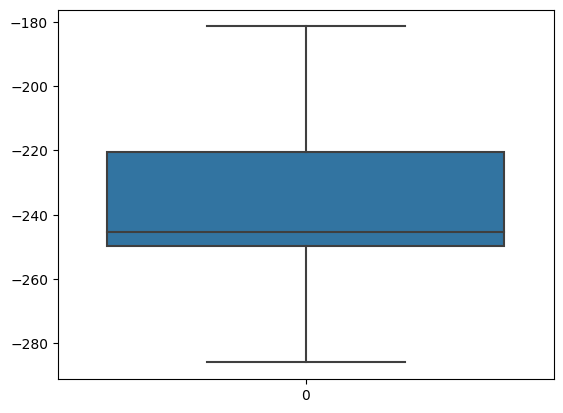

In [19]:
sns.boxplot(data=cv_results)

In [20]:
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[ -80190.73603549  -97691.86526981 -114758.81969422  -93803.50773163
  -54055.18649562]
mean: -88100.02304535349, std: 20282.1711376941


In [22]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, scoring='neg_mean_squared_error')
cv_results

{'fit_time': array([0.00300026, 0.00199556, 0.00201583, 0.00199795, 0.00199938]),
 'score_time': array([0.00101829, 0.00100136, 0.0010016 , 0.0010016 , 0.        ]),
 'test_score': array([ -80190.73603549,  -97691.86526981, -114758.81969422,
         -93803.50773163,  -54055.18649562])}